In [10]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.inspection import DecisionBoundaryDisplay

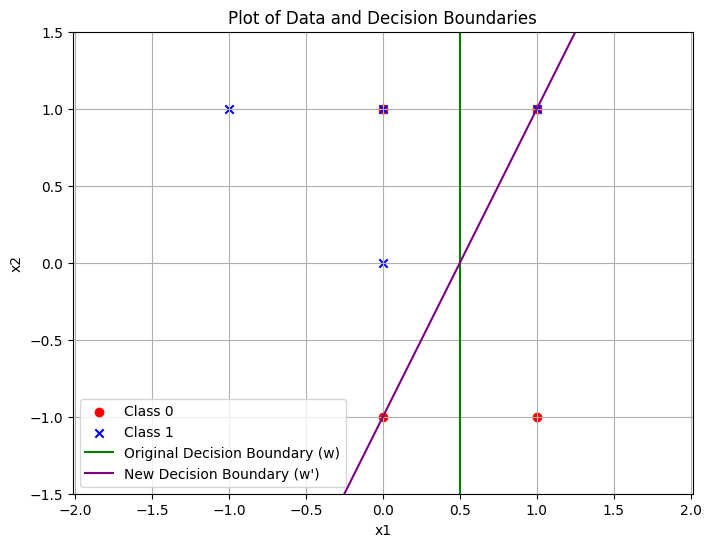

In [11]:
data = [
    {'x1': 1, 'x2': -1, 'y': 0},
    {'x1': 1, 'x2': 1, 'y': 0},
    {'x1': 0, 'x2': -1, 'y': 0},
    {'x1': 0, 'x2': 1, 'y': 0},
    {'x1': 1, 'x2': 1, 'y': 1},
    {'x1': 0, 'x2': 0, 'y': 1},
    {'x1': 0, 'x2': 1, 'y': 1},
    {'x1': -1, 'x2': 1, 'y': 1},
]

class_0 = [(d['x1'], d['x2']) for d in data if d['y'] == 0]
class_1 = [(d['x1'], d['x2']) for d in data if d['y'] == 1]

x0, y0 = zip(*class_0)
x1, y1 = zip(*class_1)

plt.figure(figsize=(8, 6))
plt.scatter(x0, y0, color='red', marker='o', label='Class 0')
plt.scatter(x1, y1, color='blue', marker='x', label='Class 1')

w_original = [1, -2, 0]  
w_new = [1, -2, 1]       

def plot_decision_boundary(weights, label, color):
    x_values = np.linspace(-1.5, 1.5, 100)
    if weights[2] != 0:  
        y_values = -(weights[0] + weights[1] * x_values) / weights[2]
    else:
        y_values = np.linspace(-1.5, 1.5, 100)
        x_values = np.repeat(-weights[0]/weights[1], 100)

    plt.plot(x_values, y_values, color=color, label=label)

plot_decision_boundary(w_original, 'Original Decision Boundary (w)', 'green')
plot_decision_boundary(w_new, 'New Decision Boundary (w\')', 'purple')

plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Plot of Data and Decision Boundaries')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.show()


[[ 1 -1]
 [ 1  1]
 [ 0 -1]
 [ 0  1]
 [ 1  1]
 [ 0  0]
 [ 0  1]
 [-1  1]]
[0 0 0 0 1 1 1 1]
Accuracy: 0.625
Intercept: [-0.10711211]
Coefficients: [[-0.49820556  0.59709775]]


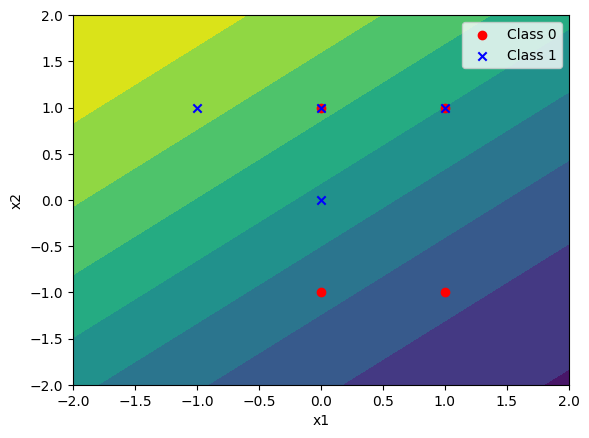

In [12]:
X = np.array([[d['x1'], d['x2']] for d in data])
y = np.array([d['y'] for d in data])
print(X)
print(y)

model = LogisticRegression()
model.fit(X, y)

y_pred = model.predict(X)
accuracy = accuracy_score(y, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Intercept: {model.intercept_}')
print(f'Coefficients: {model.coef_}')

display = DecisionBoundaryDisplay.from_estimator(model, X, response_method='predict_proba', xlabel='x1', ylabel='x2')
display.plot(ax=plt.gca())
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='red', marker='o', label='Class 0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', marker='x', label='Class 1')
plt.legend()
plt.show()

In [13]:
neg_log_likelihood = -np.mean(np.log(model.predict_proba(X)[range(len(y)), y]))
print(f'Mean Negative Log Likelihood: {neg_log_likelihood}')

def gradient(X, y, w):
    z = np.dot(X, w)
    y_pred = 1 / (1 + np.exp(-z))
    return np.dot(X.T, y_pred - y) / len(y)

grad = gradient(X, y, model.coef_[0])
print(f'Gradient: {grad}')




Mean Negative Log Likelihood: 0.570142385754292
Gradient: [ 0.06883097 -0.06460749]
